# Introduction

This project evaluates Pittsburgh neighborhoods using education as one of the core components of our overall metric. I focused on the Enrollment by School and Neighborhood dataset from WPRDC, which reports how many students attend each school within every neighborhood. My approach was to use this data to measure educational access. I tested multiple variables such as, test scores and building quality, however those datasets were inconsistente across the neiborhoods. Instead, the enrollment data was reliable and covered the entire the entire city.

# The Metric

I created an Education Score to compare Pittsburgh neighborhoods using the Enrollment by School and Neighborhood dataset. The metric is based on two factors: the total number of enrolled students in a neighborhood and the number of unique schools associated with that neighborhood. Total enrollment reflects how may students are being served locally, and school count represents the level of educational access and choice available. After calculating these values for every neighborhood, I normalized both factors to a 0-1 scale so that neighborhoods with the highest enrollment and the most schools receive the strongest scores. The final Education Score is a combined 0-100 rating that allows us to compare eduactional access across all neighborhoods. I also implemented a horizontal graph to represent the top 10 best neighborhoods based on education scores to visualize results. 



In [8]:
# Loading and previewing data
import pandas as pd

df = pd.read_csv("neighborhood_school_enrollment.csv")

df.head()

,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50


In [4]:
import pandas as pd

df = pd.read_csv("neighborhood_school_enrollment.csv")

# Cleaning the data
df = df.dropna(subset=["neighborhood", "enrolled_students"])
df["neighborhood"] = df["neighborhood"].str.strip().str.title()
df["enrolled_students"] = pd.to_numeric(df["enrolled_students"], errors="coerce")
df = df.dropna(subset=["enrolled_students"])
df = df[df["school"] != "Other"]

# Total enrollment per neighborhood
total_enrollment = (df.groupby("neighborhood")["enrolled_students"].sum().reset_index(name="total_enrollment"))

# Number of unique schools per neighborhood
school_count = (
    df.groupby("neighborhood")["school"].nunique().reset_index(name="school_count"))

merged = total_enrollment.merge(school_count, on="neighborhood")

# Normalization
min_enr = merged["total_enrollment"].min()
max_enr = merged["total_enrollment"].max()
merged["enrollment_norm"] = (merged["total_enrollment"] - min_enr) / (max_enr - min_enr)

min_sc = merged["school_count"].min()
max_sc = merged["school_count"].max()
merged["school_norm"] = (merged["school_count"] - min_sc) / (max_sc - min_sc)

# Final score
merged["education_score"] = (0.5 * merged["enrollment_norm"] + 0.5 * merged["school_norm"]) * 100

# Ranking
result = merged.sort_values("education_score", ascending=False)
result.head(10)

,neighborhood,total_enrollment,school_count,enrollment_norm,school_norm,education_score
56,Regent Square,1453,14,1.000000,0.866667,93.333333
13,Carrick,1185,16,0.814147,1.000000,90.707351
11,Brookline,1086,14,0.745492,0.866667,80.607952
35,Knoxville,513,15,0.348128,0.933333,64.073047
21,East Liberty,413,15,0.278779,0.933333,60.605640
6,Beechview,715,11,0.488211,0.666667,57.743874
58,Sheraden,566,12,0.384882,0.733333,55.910772
26,Garfield,412,13,0.278086,0.800000,53.904300
20,East Hills,495,12,0.335645,0.733333,53.448914
38,Lincoln-Lemington-Belmar,425,12,0.287101,0.733333,51.021729


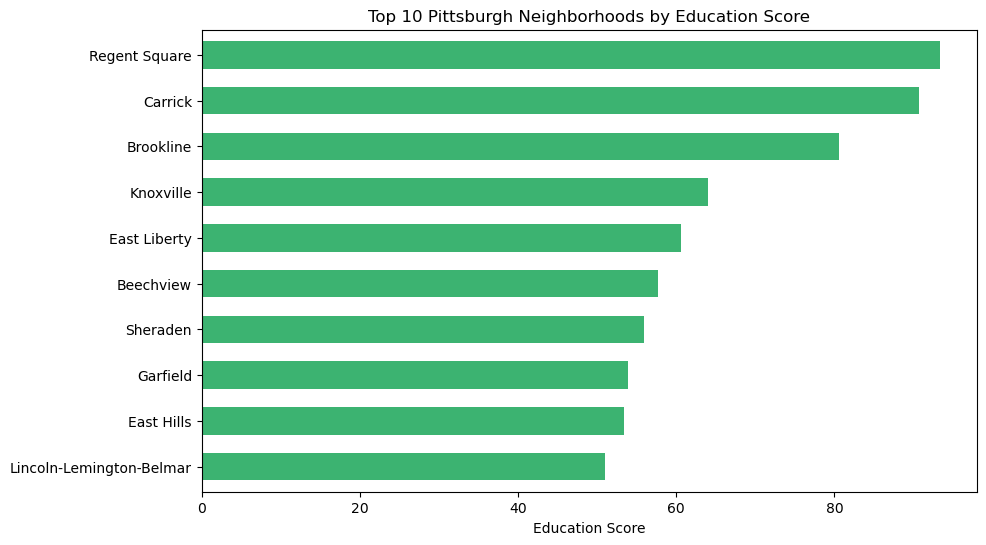

In [16]:
import matplotlib.pyplot as plt

result.head(10).plot.barh(x='neighborhood', y='education_score', color='mediumseagreen', legend=False, figsize=(10,6), width=0.6)

plt.xlabel('Education Score')
plt.ylabel('')
plt.title('Top 10 Pittsburgh Neighborhoods by Education Score')
plt.gca().invert_yaxis() 
plt.show()

# The Best Neighborhood

Using the Education Score, **Regent Square** ranks highest among all Pittsburgh neighborhoods.

+ Regent Square has several schools with strong entrollment numbers, suggesting that students in this neighborhood have better local access to education

+ The combination of high enrollment and multiple schools makes it stand out compare to neighborhoods with fewer schools or lower enrollment. 

# Conclusion

Based on the data, Regent Square is the best neighborhood in Pittsburgh for education. Its high number of schools and strong student enrollment makes it stand out in terms of educational access. 

Personally, I appreciate Regent Square becuase of its 'small town in a city' feel and the immediate access to Frick Park. While my favorite neighborhood is Tuscany Ridge in Oakdale (PA) because I live there. The data shows that Regent Square objectively provides the best educational opportunities